In [1]:
import cv2
import numpy as np
import easyocr
import imutils 
from matplotlib import pyplot as plt

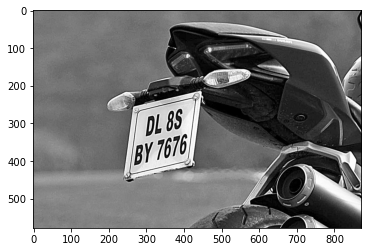

In [11]:
img = cv2.imread('vehicle.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [13]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

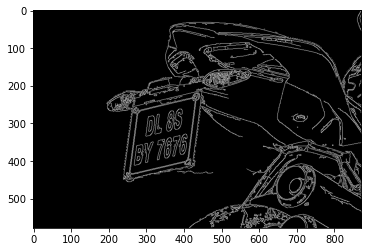

In [14]:
edge_d = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edge_d, cv2.COLOR_BGR2RGB))

In [15]:
keypoints = cv2.findContours(edge_d.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, reverse = True, key = cv2.contourArea)[:10]


In [19]:

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 5:
        location = approx
        break

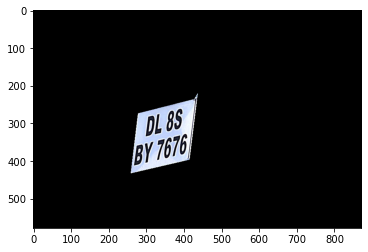

In [20]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask = mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

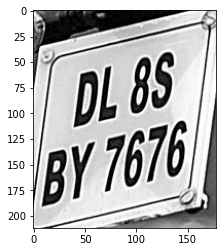

In [23]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [39]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

text = str()
for i in result:
    text += str(i[-2].strip(')').strip('\'') + " ")
print(text)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


DL 8S BY 7676 


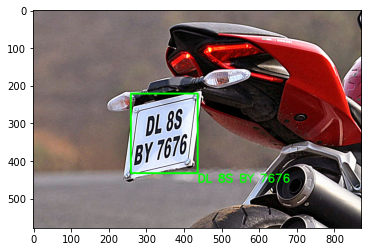

In [40]:

res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA )
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))